<a href="https://colab.research.google.com/github/JihanPaperwork/TugasAI-ANN/blob/main/TugasAIFix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path import join

#
# MNIST Data Loader Class (Note: This class will NOT be used in this solution
# as we will leverage tf.keras.datasets.mnist for easier data loading in Colab.)
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

Memuat dataset MNIST...
Dataset MNIST berhasil dimuat.


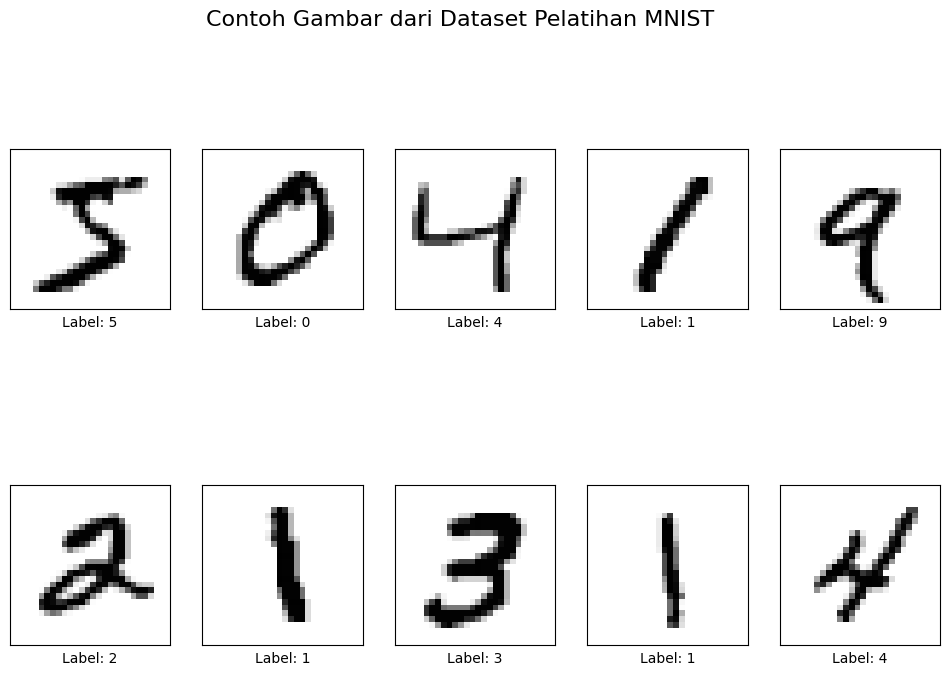

Shape x_train setelah normalisasi: (60000, 28, 28)
Shape x_test setelah normalisasi: (10000, 28, 28)
Shape y_train: (60000,)
Shape y_test: (10000,)


In [22]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np # Pastikan numpy sudah diimpor

# Muat dataset MNIST langsung dari Keras
# Ini akan mengunduh dataset jika belum ada di cache Colab Anda
print("Memuat dataset MNIST...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Dataset MNIST berhasil dimuat.")

# Tampilkan beberapa contoh gambar untuk verifikasi
plt.figure(figsize=(12, 8))
for i in range(0, 10): # Tampilkan 10 contoh dari training set
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(f"Label: {y_train[i]}")
plt.suptitle("Contoh Gambar dari Dataset Pelatihan MNIST", fontsize=16)
plt.show()

# Pra-pemrosesan Data
# Normalisasi nilai piksel ke rentang 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

print(f"Shape x_train setelah normalisasi: {x_train.shape}")
print(f"Shape x_test setelah normalisasi: {x_test.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape y_test: {y_test.shape}")

In [23]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

print("Membangun model ANN...")
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Meratakan gambar 28x28 menjadi vektor 784
    layers.Dense(128, activation='relu'), # Hidden layer dengan 128 neuron dan aktivasi ReLU
    layers.Dropout(0.2), # Dropout layer untuk mencegah overfitting
    layers.Dense(64, activation='relu'),  # Hidden layer kedua dengan 64 neuron
    layers.Dense(10, activation='softmax') # Output layer dengan 10 neuron (untuk 10 digit) dan aktivasi Softmax
])

model.summary() # Menampilkan ringkasan model

# Kompilasi Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Gunakan ini jika y_train dan y_test adalah integer
              metrics=['accuracy'])
print("Model ANN berhasil dibangun dan dikompilasi.")

Membangun model ANN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Model ANN berhasil dibangun dan dikompilasi.


Memulai pelatihan model...
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9825 - loss: 0.0509 - val_accuracy: 0.9745 - val_loss: 0.0923
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9840 - loss: 0.0472 - val_accuracy: 0.9780 - val_loss: 0.0913
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9851 - loss: 0.0445 - val_accuracy: 0.9741 - val_loss: 0.0922
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9853 - loss: 0.0440 - val_accuracy: 0.9765 - val_loss: 0.0912
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9877 - loss: 0.0383 - val_accuracy: 0.9759 - val_loss: 0.0939
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9879 - loss: 0.0340 - val_accuracy: 0.9787 - val_loss: 0.0923
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9885 - loss: 0.0328 - val_accuracy: 0.9753 - val_loss: 0.0970
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accu

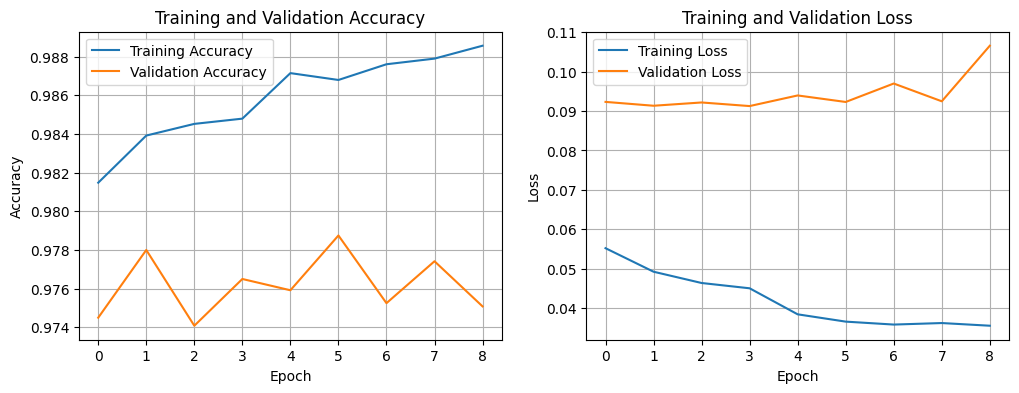

In [32]:
print("Memulai pelatihan model...")
# Konfigurasi Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Latih model Anda dengan callback early stopping
history = model.fit(x_train, y_train,
                    epochs=50, # Atur epoch yang cukup besar, early stopping akan menghentikannya
                    batch_size=32,
                    validation_split=0.2, # Penting: gunakan validation_split agar ada data validasi
                    callbacks=[early_stopping]) # Tambahkan callback di sini
print("Pelatihan model selesai.")

# Plot hasil pelatihan untuk melihat efek early stopping
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
print("Mengevaluasi model pada data uji...")
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Akurasi pada data uji: {accuracy:.4f}")
print(f"Loss pada data uji: {loss:.4f}")

Mengevaluasi model pada data uji...
313/313 - 1s - 2ms/step - accuracy: 0.9771 - loss: 0.0847
Akurasi pada data uji: 0.9771
Loss pada data uji: 0.0847


Apakah digit Anda berwarna putih di latar belakang gelap? (y/n): y


Saving 7.png to 7.png

File '7.png' berhasil diunggah. Sedang memproses...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


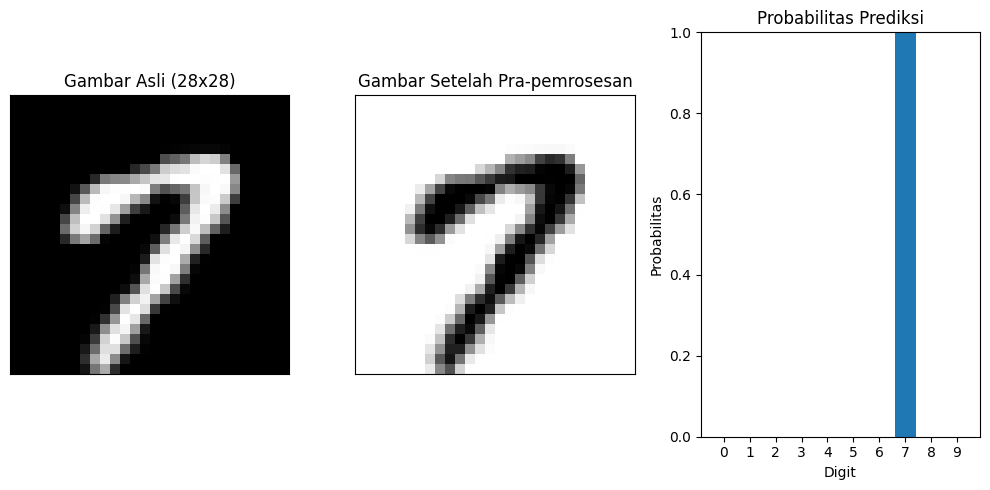


           Hasil Prediksi AI
           Digit Terdeteksi: 7
           Tingkat Kepercayaan: 100.00%



In [51]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files # Untuk fungsi upload

# Pastikan model sudah dilatih dan tersedia dari cell-cell sebelumnya.
# Jika Anda menjalankan cell ini secara terpisah, pastikan 'model' didefinisikan.

def preprocess_custom_image(image_path, invert_colors=False): # Tambah parameter invert_colors
    """
    Fungsi untuk memproses gambar kustom agar sesuai dengan input model.
    Mengkonversi gambar ke grayscale, mengubah ukuran ke 28x28, dan menormalisasi.
    """
    try:
        img = Image.open(image_path).convert('L') # Buka gambar dan konversi ke grayscale ('L' mode)
        img = img.resize((28, 28)) # Ubah ukuran gambar menjadi 28x28 piksel
        img_array = np.array(img) # Konversi ke array NumPy

        # ************** DEBUGGING PENTING: PEMBALIKAN WARNA **************
        # Jika digit Anda putih di latar belakang gelap, uncomment baris ini.
        # Jika digit Anda gelap di latar belakang putih, biarkan baris ini tetap dikomentari.
        if invert_colors:
            img_array = 255 - img_array # Membalikkan warna: putih jadi hitam, hitam jadi putih

        # Normalisasi nilai piksel ke rentang 0-1
        img_array = img_array / 255.0

        # Tambahkan dimensi batch (1, 28, 28)
        processed_img_for_model = np.expand_dims(img_array, axis=0)

        return processed_img_for_model, img_array # Mengembalikan dua nilai: untuk model dan untuk visualisasi

    except FileNotFoundError:
        print(f"Error: File '{image_path}' tidak ditemukan. Pastikan Anda sudah mengunggahnya.")
        return None, None
    except Exception as e:
        print(f"Terjadi kesalahan saat memproses gambar: {e}")
        return None, None

def predict_uploaded_image():
    """
    Mengelola proses unggah gambar dan prediksi secara interaktif.
    """


    # Pilihan untuk membalikkan warna
    invert_choice = input("Apakah digit Anda berwarna putih di latar belakang gelap? (y/n): ").lower()
    do_invert = (invert_choice == 'y')

    # Hapus file gambar yang mungkin tersisa dari unggahan sebelumnya
    current_dir_files = os.listdir('/content/')
    for f in current_dir_files:
        if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')) and os.path.isfile(os.path.join('/content/', f)):
            try:
                os.remove(os.path.join('/content/', f))
            except Exception as e:
                print(f"Gagal menghapus file {f}: {e}")

    uploaded = files.upload() # Membuka dialog unggah file

    if uploaded:
        image_file_name = list(uploaded.keys())[0] # Ambil nama file yang diunggah
        print(f"\nFile '{image_file_name}' berhasil diunggah. Sedang memproses...")

        # Panggil preprocess_custom_image dengan parameter invert_colors
        custom_image_for_model, visual_img_array = preprocess_custom_image(image_file_name, invert_colors=do_invert)

        if custom_image_for_model is not None:
            # Lakukan prediksi
            predictions = model.predict(custom_image_for_model)
            predicted_digit = np.argmax(predictions[0])
            confidence = np.max(predictions[0]) * 100

            # --- Tampilan Hasil Prediksi Interaktif ---
            plt.figure(figsize=(10, 5))

            # Subplot 1: Gambar Asli yang Diunggah (untuk referensi)
            plt.subplot(1, 3, 1)
            original_img = Image.open(image_file_name).convert('L').resize((28,28))
            plt.imshow(original_img, cmap=plt.cm.binary)
            plt.title("Gambar Asli (28x28)")
            plt.xticks([])
            plt.yticks([])

            # Subplot 2: Gambar Setelah Pra-pemrosesan (yang masuk ke model)
            plt.subplot(1, 3, 2)
            plt.imshow(visual_img_array, cmap=plt.cm.binary) # Gunakan img_array yang sudah diproses
            plt.title("Gambar Setelah Pra-pemrosesan")
            plt.xticks([])
            plt.yticks([])

            # Subplot 3: Probabilitas Prediksi
            plt.subplot(1, 3, 3)
            bar_labels = [str(i) for i in range(10)]
            plt.bar(bar_labels, predictions[0])
            plt.ylim(0, 1)
            plt.title("Probabilitas Prediksi")
            plt.xlabel("Digit")
            plt.ylabel("Probabilitas")

            plt.tight_layout()
            plt.show()

            print(f"\n" + "="*50)
            print(f"           Hasil Prediksi AI")
            print(f"           Digit Terdeteksi: {predicted_digit}")
            print(f"           Tingkat Kepercayaan: {confidence:.2f}%")
            print(f"="*50 + "\n")

        else:
            print("Gagal memproses gambar. Prediksi tidak dapat dilakukan.")
    else:
        print("Tidak ada file yang diunggah. Prediksi dibatalkan.")

# Panggil fungsi untuk memulai proses interaktif
predict_uploaded_image()